In [1]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import sklearn.metrics as mt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import warnings 
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.7f}'.format

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

/Users/injin/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
import xgboost as xgb

In [3]:
xgb.__version__

'0.90'

In [4]:
temp = pd.read_excel("data/최종낫널.xlsx")

In [5]:
temp.mpaa = temp.mpaa.apply(lambda x:1 if x == 0 else ( 2 if x == 7 
                        else(3 if x ==12 or x==13 else (4 if x == 15 
                        else 5))))

In [6]:
temp.drop(['kor_revenue'], axis = 1, inplace = True)

In [7]:
temp['kor_audience_class'] = temp.kor_audience.apply(lambda x: "A" if x >= 5000000 else("B" if x >= 1000000 else( "C" if x >= 100000 else ( "D" if x >= 1000 else "F"))))

In [8]:
full_cols = ['movienm', 'showtm', 'prdtyear', 'Domestic', 'mpaa', 'raters',
       'ratings', 'sf', 'family', 'performance', 'horror', 'etc',
       'documentary', 'drama', 'romance', 'musical', 'mystery', 'crime',
       'history', 'western', 'adult', 'thriller', 'animation', 'action',
       'adventure', 'war', 'comedy', 'fantasy', 'director_appearance',
       'director_revenue', 'distributor_share', 'opendt_quarter', 'year_gap',
       'showtypes_num', 'actor_score', 'neg', 'pos', 'neu', 'compound',
       'story_com', 'music_com', 'direction_com', 'actor_com', 'acting_com',
       'story_pos', 'music_pos', 'direction_pos', 'actor_pos', 'acting_pos',
       'story_neg', 'music_neg', 'direction_neg', 'actor_neg', 'acting_neg',
       'x0', 'x1', 'x2', 'x3', 'x4', 'label', 'center_angle1', 'center_angle2',
       'center_angle3', 'center_angle4', 'center_angle5', 'center_angle6',
       'center_angle7', 'center_angle8', 'center_angle9', 'center_angle10']

x_cols1 =['showtm', 'prdtyear', 'Domestic', 'mpaa', 'raters',
       'ratings', 'sf', 'family', 'performance', 'horror', 'etc',
       'documentary', 'drama', 'romance', 'musical', 'mystery', 'crime',
       'history', 'western', 'adult', 'thriller', 'animation', 'action',
       'adventure', 'war', 'comedy', 'fantasy', 'director_appearance',
        'distributor_share',
       'showtypes_num', 'actor_score','compound',
       'story_com', 'music_com', 'direction_com', 'actor_com', 'acting_com',
       'x0', 'x1', 'x2', 'x3', 'x4']

x_cols2 = ['showtm', 'prdtyear', 'Domestic', 'mpaa', 'raters',
       'ratings', 'sf', 'family', 'performance', 'horror', 'etc',
       'documentary', 'drama', 'romance', 'musical', 'mystery', 'crime',
       'history', 'western', 'adult', 'thriller', 'animation', 'action',
       'adventure', 'war', 'comedy', 'fantasy', 'director_appearance',
        'distributor_share',
       'showtypes_num', 'actor_score', 'x0', 'x1', 'x2', 'x3', 'x4'
]

x_cols3 = ['showtm', 'prdtyear', 'Domestic', 'mpaa', 'raters',
       'ratings', 'sf', 'family', 'performance', 'horror', 'etc',
       'documentary', 'drama', 'romance', 'musical', 'mystery', 'crime',
       'history', 'western', 'adult', 'thriller', 'animation', 'action',
       'adventure', 'war', 'comedy', 'fantasy', 'director_appearance',
        'distributor_share',
       'showtypes_num', 'actor_score']

y_cols = ['kor_audience_class']


X = temp[x_cols1]
X2 = temp[x_cols2]
X3 = temp[x_cols3]
Y = temp[y_cols]

In [9]:
transformer = StandardScaler().fit(X)
X = transformer.transform(X)

transformer = StandardScaler().fit(X2)
X2 = transformer.transform(X2)

transformer = StandardScaler().fit(X3)
X3 = transformer.transform(X3)

In [10]:
X_train, X_test, y_train, y_test =\
train_test_split(X, Y,\
                    test_size = 0.3, \
                    random_state = 55)
X_train2, X_test2, y_train2, y_test2 =\
train_test_split(X2, Y,\
                    test_size = 0.3, \
                    random_state = 55)
X_train3, X_test3, y_train3, y_test3 =\
train_test_split(X3, Y,\
                    test_size = 0.3, \
                    random_state = 55)


In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
X_train_over2, y_train_over2 = smote.fit_sample(X_train2, y_train2)
X_train_over3, y_train_over3 = smote.fit_sample(X_train3, y_train3)

In [12]:
xgb_clf = XGBClassifier(n_estimators = 100, max_depth = 3, max_features =5)
xgb_clf.fit(X_train_over, y_train_over, early_stopping_rounds = 100, 
             eval_set = [(X_test, y_test)], eval_metric = 'merror',verbose = False)
#평가
print('학습데이터 정확도:', xgb_clf.score(X_train_over, y_train_over))
print('테스트데이터 정확도:', xgb_clf.score(X_test, y_test))

학습데이터 정확도: 0.8501915708812261
테스트데이터 정확도: 0.723018147086915


In [13]:
xgb_clf2 = XGBClassifier(n_estimators = 100, max_depth = 3, max_features =5)
xgb_clf2.fit(X_train_over2, y_train_over2, early_stopping_rounds = 100, 
             eval_set = [(X_test2, y_test2)], eval_metric = 'merror',verbose = False)
#평가
print('학습데이터 정확도:', xgb_clf2.score(X_train_over2, y_train_over2))
print('테스트데이터 정확도:', xgb_clf2.score(X_test2, y_test2))

학습데이터 정확도: 0.8507662835249042
테스트데이터 정확도: 0.708691499522445


In [14]:
xgb_clf3 = XGBClassifier(n_estimators = 100, max_depth = 3, max_features =5)
xgb_clf3.fit(X_train_over3, y_train_over3, early_stopping_rounds = 100, 
             eval_set = [(X_test3, y_test3)], eval_metric = 'merror',verbose = False)
#평가
print('학습데이터 정확도:', xgb_clf3.score(X_train_over3, y_train_over3))
print('테스트데이터 정확도:', xgb_clf3.score(X_test3, y_test3))

학습데이터 정확도: 0.8310344827586207
테스트데이터 정확도: 0.6972301814708691


In [15]:
y_pred = xgb_clf.predict(X_test)
y_pred2 = xgb_clf2.predict(X_test2)
y_pred3 = xgb_clf3.predict(X_test3)

In [16]:
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='macro')
    recall = recall_score(y_test, pred, average='macro')
    f1 = f1_score(y_test, pred, average='macro')
    print("오차행렬")
    print(confusion)
    print("정확도",accuracy)
    print("정밀도",precision)
    print("재현율",recall)
    print("F1",f1)

In [17]:
get_clf_eval(y_test, y_pred)

오차행렬
[[  3   2   0   0   0]
 [  8  44  26   5   1]
 [  2  32 120  39   1]
 [  0   2  49 209  67]
 [  0   0   5  51 381]]
정확도 0.723018147086915
정밀도 0.5829871794871795
재현율 0.6506727005276114
F1 0.6001143722120998


In [18]:
get_clf_eval(y_test2, y_pred2)

오차행렬
[[  1   4   0   0   0]
 [ 11  42  26   4   1]
 [  2  32 126  33   1]
 [  0   3  52 201  71]
 [  0   0   6  59 372]]
정확도 0.708691499522445
정밀도 0.5405339645789085
재현율 0.5630844032801482
F1 0.5451769254840051


In [19]:
get_clf_eval(y_test3, y_pred3)

오차행렬
[[  1   3   1   0   0]
 [ 10  46  23   4   1]
 [  3  36 115  38   2]
 [  0   2  56 196  73]
 [  0   0   5  60 372]]
정확도 0.6972301814708691
정밀도 0.5326478934549983
재현율 0.5582099026428555
F1 0.5389818330161059


In [20]:
pd.DataFrame(
[[accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average='macro'),recall_score(y_test, y_pred, average='macro')],
 [accuracy_score(y_test, y_pred2),precision_score(y_test, y_pred2, average='macro'),recall_score(y_test, y_pred2, average='macro')],
 [accuracy_score(y_test, y_pred3),precision_score(y_test, y_pred3, average='macro'),recall_score(y_test, y_pred3, average='macro')]], index=['R&S', 'S','None'] ,columns=['정확도','정밀도','재현율']).style.background_gradient(cmap='summer')

,정확도,정밀도,재현율
R&S,0.723018,0.582987,0.650673
S,0.708691,0.540534,0.563084
None,0.697230,0.532648,0.558210


In [21]:
from xgboost import plot_importance

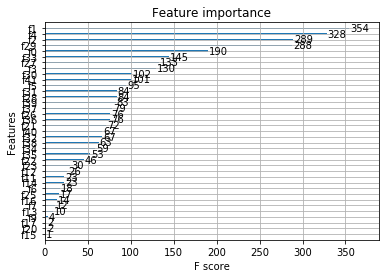

In [22]:
plot_importance(xgb_clf)

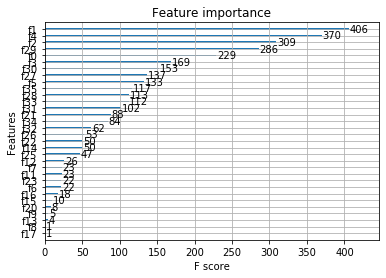

In [23]:
plot_importance(xgb_clf2)

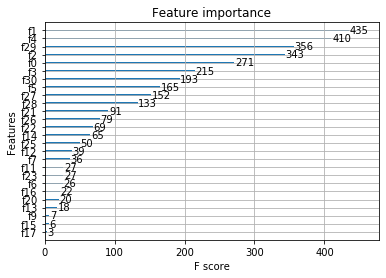

In [24]:
plot_importance(xgb_clf3)

In [25]:
temp.columns

Index(['index', 'movienm', 'showtm', 'prdtyear', 'Domestic', 'mpaa', 'raters',
       'ratings', 'kor_audience', 'kor_audience_class', 'sf', 'family',
       'performance', 'horror', 'etc', 'documentary', 'drama', 'romance',
       'musical', 'mystery', 'crime', 'history', 'western', 'adult',
       'thriller', 'animation', 'action', 'adventure', 'war', 'comedy',
       'fantasy', 'director_appearance', 'director_revenue',
       'distributor_share', 'opendt_quarter', 'year_gap', 'showtypes_num',
       'actor_score', 'neg', 'pos', 'neu', 'compound', 'story_com',
       'music_com', 'direction_com', 'actor_com', 'acting_com', 'story_pos',
       'music_pos', 'direction_pos', 'actor_pos', 'acting_pos', 'story_neg',
       'music_neg', 'direction_neg', 'actor_neg', 'acting_neg', 'x0', 'x1',
       'x2', 'x3', 'x4', 'label', 'center_angle1', 'center_angle2',
       'center_angle3', 'center_angle4', 'center_angle5', 'center_angle6',
       'center_angle7', 'center_angle8', 'center_angle9',

In [26]:
review = ['neg', 'pos', 'neu', 'story_pos',
       'music_pos', 'direction_pos', 'actor_pos', 'acting_pos', 'story_neg',
       'music_neg', 'direction_neg', 'actor_neg', 'acting_neg']

In [27]:
corr_df = temp.corr()

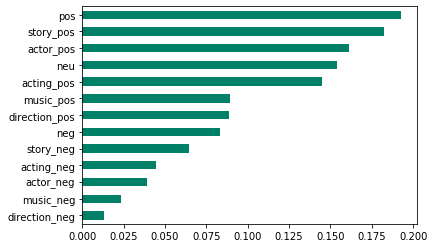

In [28]:
corr_df[review].loc['kor_audience'].sort_values().plot(kind = 'barh', cmap = 'summer')

In [29]:
temp2 = temp[temp.kor_audience_class == 'D']

In [30]:
corr_df2 = temp2.corr()

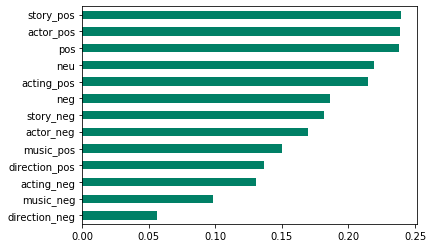

In [31]:
corr_df2[review].loc['kor_audience'].sort_values().plot(kind = 'barh', cmap = 'summer')

In [32]:
temp3 = temp[temp.kor_audience_class == 'A']

In [33]:
corr_df3 = temp3.corr()

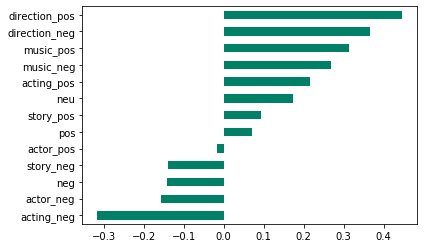

In [34]:
corr_df3[review].loc['kor_audience'].sort_values().plot(kind = 'barh', cmap = 'summer')